<a href="https://colab.research.google.com/github/Temple2001/ML_practice/blob/main/codes/OneHotEncoding_practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

def numerical_derivative(f, x):
    delta_x = 1e-4 # 0.0001
    grad = np.zeros_like(x)
    
    it = np.nditer(x, flags=['multi_index'], op_flags=['readwrite'])
    
    while not it.finished:
        idx = it.multi_index        
        tmp_val = x[idx]
        x[idx] = float(tmp_val) + delta_x
        fx1 = f(x) # f(x+delta_x)
        
        x[idx] = float(tmp_val) - delta_x 
        fx2 = f(x) # f(x-delta_x)
        grad[idx] = (fx1 - fx2) / (2*delta_x)
        
        x[idx] = tmp_val 
        it.iternext()   
        
    return grad


def sigmoid(x):
    return 1 / (1+np.exp(-x))

In [3]:
class Diabetes:
    
    def __init__(self, name, input_nodes, hidden1_nodes, output_nodes, learning_rate):
        
        self.name = name
        
        self.W2 = np.random.rand(input_nodes, hidden1_nodes)  
        self.b2 = np.random.rand(hidden1_nodes)
          
        self.W3 = np.random.rand(hidden1_nodes, output_nodes)
        self.b3 = np.random.rand(output_nodes)

        self.learning_rate = learning_rate
        
        print(self.name, " is created !!!")
        
    def feed_forward(self):
        
        delta = 1e-7    
    
        z2 = np.dot(self.input_data, self.W2) + self.b2
        a2 = sigmoid(z2)
        
        z3 = np.dot(a2, self.W3) + self.b3
        y = a3 = sigmoid(z3)

        return  -np.sum( self.target_data*np.log(y + delta) + (1-self.target_data)*np.log((1 - y)+delta ) )
    
    def loss_val(self):
        
        delta = 1e-7   
    
        z2 = np.dot(self.input_data, self.W2) + self.b2
        a2 = sigmoid(z2)
        
        z3 = np.dot(a2, self.W3) + self.b3
        y = a3 = sigmoid(z3)

        return  -np.sum( self.target_data*np.log(y + delta) + (1-self.target_data)*np.log((1 - y)+delta ) )
    
    def predict(self, input_data):    
        
        z2 = np.dot(input_data, self.W2) + self.b2
        a2 = sigmoid(z2)
        
        z3 = np.dot(a2, self.W3) + self.b3
        y = a3 = sigmoid(z3)

        predicted_num = np.argmax(y)
    
        return predicted_num
    
    def accuracy(self, input_data, target_data):
        
        matched_list = []
        not_matched_list = []
        
        for index in range(len(input_data)):
            
            # one-hot encoding 방식으로 하기 위한 코드 수정
            label = int(target_data[index])
            
            predicted_num = self.predict(input_data[index])
            
            if predicted_num == label:
                matched_list.append(index)
            else:
                not_matched_list.append(index)
                
        accuracy_val = len(matched_list) / len(input_data)
        
        return accuracy_val
        
        
    def train(self, input_data, target_data):
        
        self.input_data = input_data
        self.target_data = target_data
        
        f = lambda x : self.feed_forward()
        
        self.W2 -= self.learning_rate * numerical_derivative(f, self.W2)
    
        self.b2 -= self.learning_rate * numerical_derivative(f, self.b2)
        
        self.W3 -= self.learning_rate * numerical_derivative(f, self.W3)
    
        self.b3 -= self.learning_rate * numerical_derivative(f, self.b3)

In [10]:
class DataGeneration:

    def __init__(self, name, file_path, seperation_rate, target_position=-1):
        
        self.name = name
        self.file_path = file_path
        self.seperation_rate = seperation_rate

        if (target_position == -1 or target_position == 0):
            self.target_position = target_position
        else:
            err_str = 'target_position must be -1 or 0'
            raise Exception(err_str)
    
    def __display_target_distribution(self, data, str_of_kind='original data'):

        print('=======================================================================================================')

        target_data = data[:, self.target_position]

        unique, counts = np.unique(target_data, return_counts=True)

        unique_target = []

        for index in range(len(unique)):
        
            print('[DataGeneration] unique number of ' + str_of_kind + ' = ', unique[index], ', count = ', counts[index])
        
            unique_target.append(unique[index])

        for index in range(len(unique_target)):
        
            print('[DataGeneration] unique number of ' + str_of_kind + ' = ', unique_target[index], ', ratio = ', np.round(100 * counts[index] / (target_data.shape[0]), 2), ' %')
    
        print('=======================================================================================================')

    def generate(self):

        try:
            loaded_data = np.loadtxt(self.file_path, delimiter=',', dtype=np.float32)
        
        except Exception as err:
            print('[DataGeneration::generate()] ', str(err))
            raise Exception(str(err))
        
        print('[DataGeneration] loaded_data.shape = ', loaded_data.shape)

        self.__display_target_distribution(loaded_data, 'original data')

        total_data_num = len(loaded_data)
        test_data_num = int(len(loaded_data) * self.seperation_rate)

        np.random.shuffle(loaded_data)

        test_data = loaded_data[0: test_data_num]
        training_data = loaded_data[test_data_num:]

        self.__display_target_distribution(training_data, 'training data')
        self.__display_target_distribution(test_data, 'test data')

        return training_data, test_data

In [11]:
test_seperation_rate = 0.3

try:

    data_obj = DataGeneration('Diabetes', 'diabetes.csv', test_seperation_rate)

    (training_data, test_data) = data_obj.generate()

    print('==================================================')
    print('training data.shape = ', training_data.shape)
    print('test data.shape = ', test_data.shape)
    print('==================================================')

except Exception as err:

    print('Exception occur !!')

[DataGeneration] loaded_data.shape =  (759, 9)
[DataGeneration] unique number of original data =  0.0 , count =  263
[DataGeneration] unique number of original data =  1.0 , count =  496
[DataGeneration] unique number of original data =  0.0 , ratio =  34.65  %
[DataGeneration] unique number of original data =  1.0 , ratio =  65.35  %
[DataGeneration] unique number of training data =  0.0 , count =  181
[DataGeneration] unique number of training data =  1.0 , count =  351
[DataGeneration] unique number of training data =  0.0 , ratio =  34.02  %
[DataGeneration] unique number of training data =  1.0 , ratio =  65.98  %
[DataGeneration] unique number of test data =  0.0 , count =  82
[DataGeneration] unique number of test data =  1.0 , count =  145
[DataGeneration] unique number of test data =  0.0 , ratio =  36.12  %
[DataGeneration] unique number of test data =  1.0 , ratio =  63.88  %
training data.shape =  (532, 9)
test data.shape =  (227, 9)


In [12]:
i_nodes = training_data.shape[1] - 1
h1_nodes = 30
o_nodes = 2
lr = 1e-2
epochs = 20

loss_val_list = []
accuracy_val_list = []
validation_accuracy_val_list = []

obj1 = Diabetes('Diabetes', i_nodes, h1_nodes, o_nodes, lr)

print('Neural Network Learning using Numerical Derivative...')

start_time = datetime.now()

for step in range(epochs):

    for index in range(len(training_data)):

        input_data = training_data[index, 0:-1]

        # one-hot encoding 방식으로 표현
        target_data = np.zeros(o_nodes) + 0.01
        target_data[int(training_data[index, -1])] = 0.99

        obj1.train(input_data, target_data)

    cur_loss_val = obj1.loss_val()
    loss_val_list.append(cur_loss_val)

    training_accuracy = obj1.accuracy(training_data[:, 0:-1], training_data[:, -1])
    validation_accuracy = obj1.accuracy(test_data[:, 0:-1], test_data[:, -1])

    print('====================================================================')
    print("step = ", step, "            current loss value = ", cur_loss_val, '\n')
    print("step = ", step, "[training data] accuracy value = ", np.round(100*training_accuracy,4), ' %')
    
    accuracy_val_list.append(training_accuracy)
    
    print("step = ", step, "[validation data] accuracy value = ", np.round(100*validation_accuracy,4), ' %')
    
    validation_accuracy_val_list.append(validation_accuracy)

    print('====================================================================')

end_time = datetime.now()
        
print("")
print("Elapsed Time => ", end_time - start_time)

Diabetes  is created !!!
Neural Network Learning using Numerical Derivative...
step =  0             current loss value =  1.7742021855259664 

step =  0 [training data] accuracy value =  65.9774  %
step =  0 [validation data] accuracy value =  63.8767  %
step =  1             current loss value =  1.5859815948598146 

step =  1 [training data] accuracy value =  66.1654  %
step =  1 [validation data] accuracy value =  63.4361  %
step =  2             current loss value =  1.4537074305836895 

step =  2 [training data] accuracy value =  68.4211  %
step =  2 [validation data] accuracy value =  69.163  %
step =  3             current loss value =  1.34838909155745 

step =  3 [training data] accuracy value =  70.6767  %
step =  3 [validation data] accuracy value =  71.8062  %
step =  4             current loss value =  1.262936164151903 

step =  4 [training data] accuracy value =  71.8045  %
step =  4 [validation data] accuracy value =  73.5683  %
step =  5             current loss value

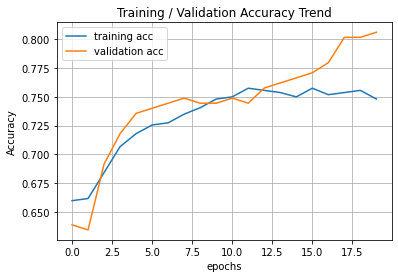

In [13]:
plt.title('Training / Validation Accuracy Trend')
plt.xlabel('epochs')
plt.ylabel('Accuracy')
plt.grid()
plt.plot(accuracy_val_list, label='training acc')
plt.plot(validation_accuracy_val_list, label='validation acc')
plt.legend(loc='best')

plt.show()

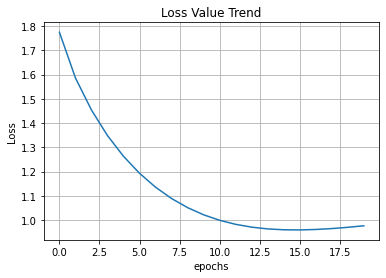

In [14]:
plt.title('Loss Value Trend')
plt.xlabel('epochs')
plt.ylabel('Loss')
plt.grid()
plt.plot(loss_val_list)

plt.show()

In [15]:
test_input_data = test_data[ :, 0:-1 ]
test_target_data = test_data[ :, -1 ]

accuracy_ret = obj1.accuracy(test_input_data, test_target_data) 

print('Test Data Accuracy = ', np.round(accuracy_ret, 3))

Test Data Accuracy =  0.806
